# Deburijn graph class

In [47]:
def reverseComplement(seq):
    complementDict = {'A':'T', 'T':'A', 'G':'C', 'C':'G'}
    seq = ''.join([complementDict[i] for i in seq])
    return seq[::-1]

import networkx as nx
class deburijnGraph(nx.MultiDiGraph):
    def __init__(self, readList = [], k = 4):
        nx.MultiDiGraph.__init__(self)
        
        self.readList = []
        self.k = 5
        for read in readList:
            for i in xrange(len(read) - k + 1):
                for kmer in (read[i:i+k], reverseComplement(read[i:i+k])):
                    head = kmer[:-1]
                    tail = kmer[1:]
                    self.add_node(head)
                    self.add_node(tail)
                    self.add_edge(head, tail, label=kmer)        

# Read reads

In [48]:
fp = open('GASM.txt')
readList = map(lambda x:x.strip(), fp.readlines())
fp.close()

# Build deburijn graph

In [49]:
dG = deburijnGraph(readList)

#Graphviz deburijn graph

In [50]:
A=nx.to_agraph(dG)
A.graph_attr.update(label='Debruijn graph', fontsize='20.0')
A.node_attr.update(color='#336699', fontcolor='black')
A.edge_attr.update(color='#99CC33', fontcolor='black')
A.layout('circo')
A.draw('deburijnGraph.png')

# Display graph

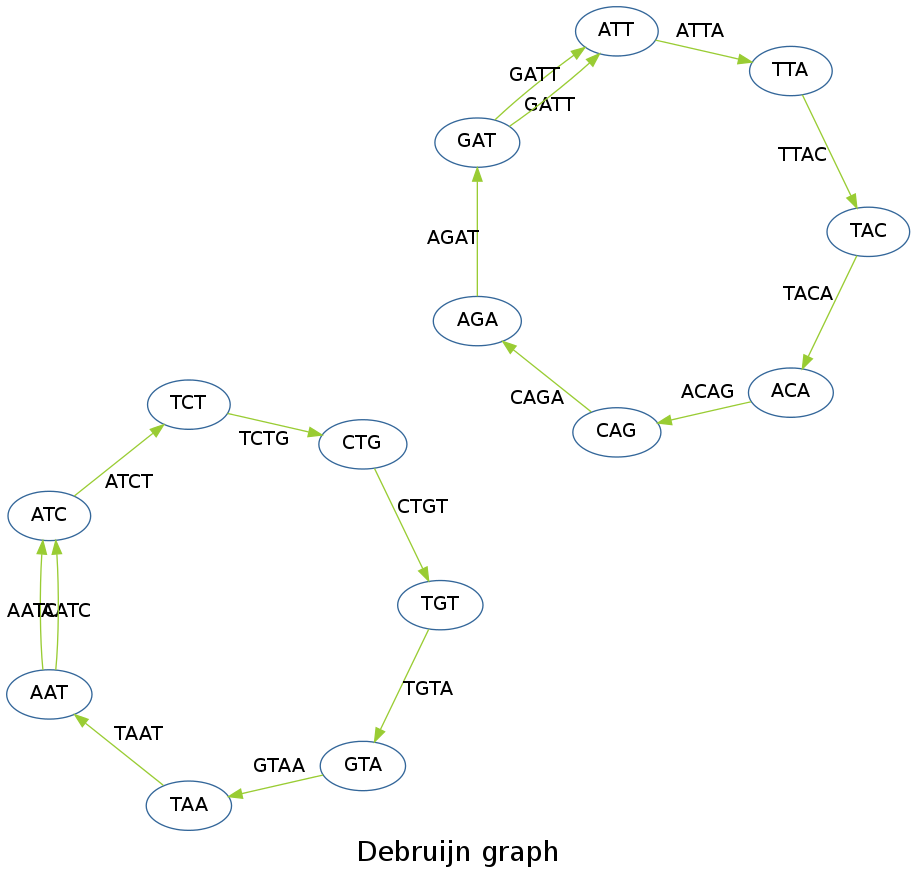

In [51]:
from IPython import display
display.Image('deburijnGraph.png')